In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.set_default_tensor_type(torch.cuda.FloatTensor)

from layer.modules.ssd import SSD
from layer.modules.loss import SSDLoss

import pickle
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

import time

In [3]:
with open('./anno_2007_trainval.bin','rb') as fp:
    anno_data = pickle.load(fp)
print(anno_data[0])
print(os.path.isfile('./VOCdevkit/VOC2007/JPEGImages/'+anno_data[0][0]))

('000005.jpg', [(8, 263, 211, 324, 339), (8, 165, 264, 253, 372), (8, 5, 244, 67, 374), (8, 241, 194, 295, 299), (8, 277, 186, 312, 220)])
True


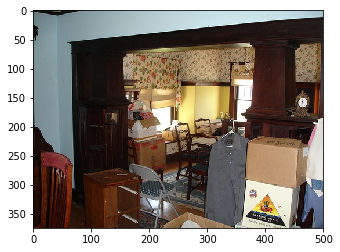

In [4]:
a = cv2.imread('./VOCdevkit/VOC2007/JPEGImages/'+anno_data[0][0])[...,::-1]

plt.imshow(a)

In [5]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(
        self, anno_file, img_dir
    ):
        with open(anno_file, 'rb') as fp:
            self.anno_data = pickle.load(fp)
        self.img_dir = img_dir
    
    def __len__(self):
        return len(self.anno_data)
    
    def __getitem__(self, idx):
        return (cv2.imread(self.img_dir+self.anno_data[idx][0])[...,::-1], self.anno_data[idx][1])

In [6]:
test_2007 = TestDataset('./anno_2007_trainval.bin', './VOCdevkit/VOC2007/JPEGImages/')
test_2012 = TestDataset('./anno_2012_trainval.bin', './VOCdevkit/VOC2012/JPEGImages/')

test_dataset = test_2007 + test_2012

In [7]:
def detection_collate(batch):
    return [i[0] for i in batch], \
        [torch.FloatTensor(i[1]) for i in batch]

In [8]:
data_loader = torch.utils.data.DataLoader(test_dataset, 4, num_workers=4,
                shuffle=True, collate_fn=detection_collate,
                pin_memory=True)


In [9]:
len(data_loader)

4138

In [10]:
spaned = time.time()
batch_iter = iter(data_loader)
j = 0
for i in batch_iter:
    j += 1
    if j > 4138:
        print('over!')
        break
spaned = time.time() - spaned

In [11]:
spaned

231.79655408859253

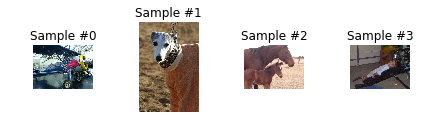

In [12]:
batch_iter = iter(data_loader)
for i in batch_iter:
    for j in range(4):
        ax = plt.subplot(1, 4, j + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(j))
        ax.axis('off')
        plt.imshow(i[0][j])
    break